In [10]:
from scipy.io import loadmat

# Carga el archivo .mat
data = loadmat(r'C:\Users\oswal\OneDrive\Documentos\GitHub\Neurociencias-2025-2\sample_1.mat')  # USAR SIEMPRE la cadena r xd

# Ve las variables contenidas en el archivo
print(data.keys())


dict_keys(['__header__', '__version__', '__globals__', 'samplingInterval', 'startData', 'chan', 'data', 'spike_times', 'spike_class'])


In [11]:
import numpy as np

# Para ver qué hay en spike_times y spike_class
print(data['spike_times'].shape)
print(data['spike_class'].shape)

# Ve los primeros valores
print(data['spike_times'][:10])
print(data['spike_class'][:10])


(1, 1)
(1, 1)
[[array([[    545,    1127,    2017, ..., 2877892, 2878542, 2879588]])]]
[[array([[0, 0, 1, ..., 0, 0, 0]], dtype=uint8)]]


In [12]:
# Extraemos los arrays reales
spike_times = data['spike_times'][0, 0][0]
spike_class = data['spike_class'][0, 0][0]

# Verificamos dimensiones
print(spike_times.shape)     # Por ejemplo, (13456,)
print(spike_class.shape)     # Igual que spike_times

# Mostramos primeros valores
print(spike_times[:10])
print(spike_class[:10])


(3214,)
(3214,)
[  545  1127  2017  3017  4170  5929  6347  6993  8108 11649]
[0 0 1 0 0 0 0 1 2 0]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Número de neuronas diferentes
clases_unicas = np.unique(spike_class)
print(f"Número de neuronas detectadas: {len(clases_unicas)}")
print(f"Neuronas: {clases_unicas}")

# Conteo de spikes por neurona
conteo_spikes = np.bincount(spike_class)
for i, total in enumerate(conteo_spikes):
    print(f"Neurona {i}: {total} spikes")


Número de neuronas detectadas: 3
Neuronas: [0 1 2]
Neurona 0: 2156 spikes
Neurona 1: 529 spikes
Neurona 2: 529 spikes


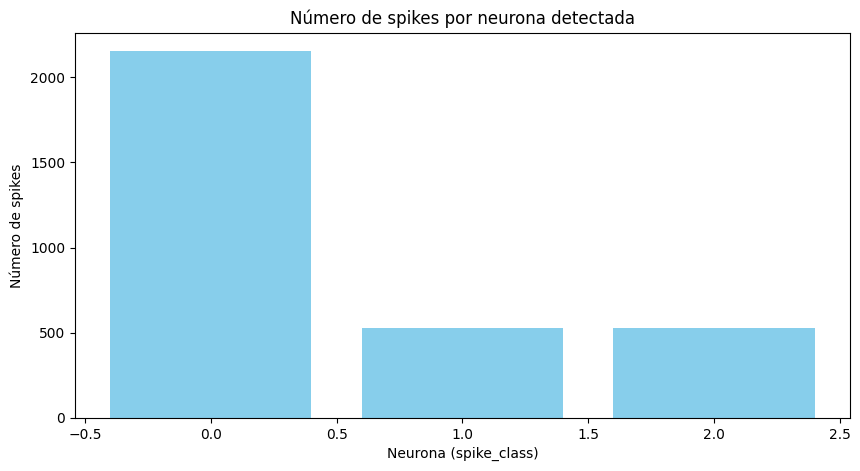

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(conteo_spikes)), conteo_spikes, color='skyblue')
plt.xlabel('Neurona (spike_class)')
plt.ylabel('Número de spikes')
plt.title('Número de spikes por neurona detectada')
plt.show()


In [15]:
# Extraer el intervalo de muestreo (en microsegundos normalmente)
sampling_interval = data['samplingInterval'][0][0]  # por ejemplo, 20 μs
print(f"Sampling interval: {sampling_interval} μs")

# Convertimos spike_times a segundos
spike_times_sec = spike_times * (sampling_interval * 1e-6)


Sampling interval: 0.041666666666666664 μs


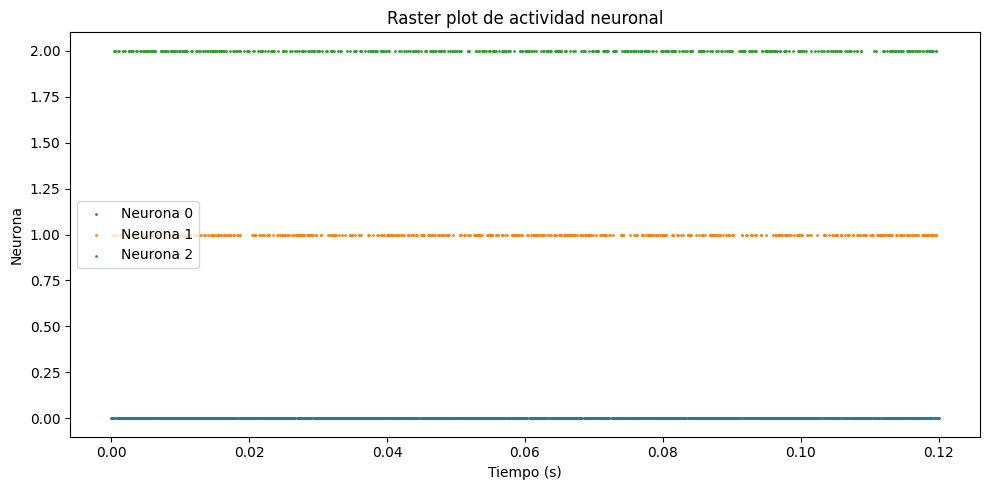

In [16]:
plt.figure(figsize=(10, 5))

for clase in clases_unicas:
    tiempos = spike_times_sec[spike_class == clase]
    plt.scatter(tiempos, [clase]*len(tiempos), s=1, label=f'Neurona {clase}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Neurona')
plt.title('Raster plot de actividad neuronal')
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
duracion_total_s = spike_times_sec.max() - spike_times_sec.min()
print(f"Duración total de la grabación: {duracion_total_s:.2f} segundos")


Duración total de la grabación: 0.12 segundos


In [24]:
import numpy as np

# Redefinimos spike_times_sec por si también se perdió
sampling_interval = data['samplingInterval'].item()  # Esto extrae el escalar  # En microsegundos
spike_times = data['spike_times'][0, 0][0]
spike_class = data['spike_class'][0, 0][0]

# Convertimos a segundos
spike_times_sec = spike_times * (sampling_interval * 1e-6)

# Identificamos neuronas
neuronas = np.unique(spike_class)

# Mostramos número de spikes por neurona
for n in neuronas:
    conteo = np.sum(spike_class == n)
    print(f"Neurona {n}: {conteo} spikes")


Neurona 0: 2156 spikes
Neurona 1: 529 spikes
Neurona 2: 529 spikes


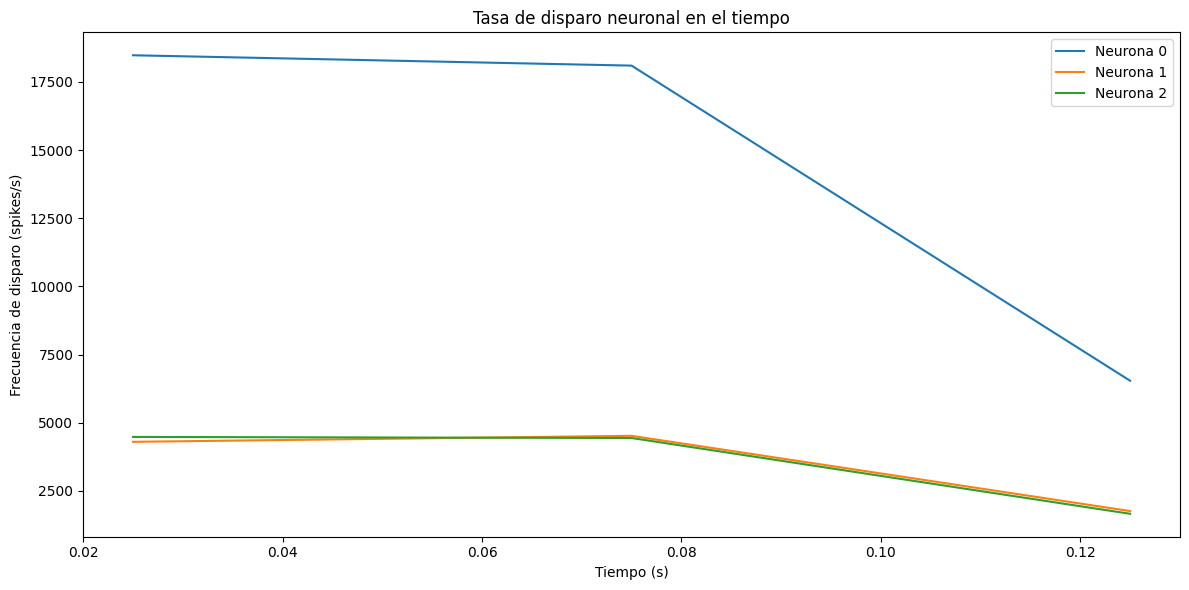

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
ventana_ms = 50  # Tamaño de la ventana deslizante en milisegundos
ventana_s = ventana_ms / 1000  # Convertimos a segundos
tiempo_total = spike_times_sec.max()

# Creamos las ventanas de tiempo
bins = np.arange(0, tiempo_total + ventana_s, ventana_s)

# Preparamos una figura
plt.figure(figsize=(12, 6))

# Iteramos sobre las neuronas
for i, neurona_id in enumerate(neuronas):
    # Extraemos los tiempos de spike para esa neurona
    tiempos_neurona = spike_times_sec[spike_class == neurona_id]
    
    # Histograma de spikes por ventana
    conteo, _ = np.histogram(tiempos_neurona, bins=bins)
    
    # Calculamos la tasa (spikes/seg)
    tasa_firing = conteo / ventana_s
    
    # Tiempo para el eje X (centro de las ventanas)
    tiempo_x = bins[:-1] + ventana_s / 2
    
    # Graficamos
    plt.plot(tiempo_x, tasa_firing, label=f'Neurona {neurona_id}')

plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia de disparo (spikes/s)')
plt.title('Tasa de disparo neuronal en el tiempo')
plt.legend()
plt.tight_layout()
plt.show()


In [26]:
# Duración total del registro en segundos
duracion_total = spike_times_sec.max() - spike_times_sec.min()

print(f"Duración total del registro: {duracion_total:.3f} segundos\n")

# Frecuencia promedio por neurona (spikes/segundo)
for n in neuronas:
    num_spikes = np.sum(spike_class == n)
    frecuencia = num_spikes / duracion_total
    print(f"Neurona {n}: {frecuencia:.2f} spikes/segundo")


Duración total del registro: 0.120 segundos

Neurona 0: 17972.64 spikes/segundo
Neurona 1: 4409.80 spikes/segundo
Neurona 2: 4409.80 spikes/segundo


In [27]:
# Asegurarnos de tener los arrays
import numpy as np

# Duración total del registro en segundos
duracion_total = spike_times_sec.max() - spike_times_sec.min()

print(f"Duración total del registro: {duracion_total:.3f} segundos\n")

# Frecuencia promedio por neurona (spikes/segundo)
for n in neuronas:
    num_spikes = np.sum(spike_class == n)
    frecuencia = num_spikes / duracion_total
    print(f"Neurona {n}: {frecuencia:.2f} spikes/segundo")


Duración total del registro: 0.120 segundos

Neurona 0: 17972.64 spikes/segundo
Neurona 1: 4409.80 spikes/segundo
Neurona 2: 4409.80 spikes/segundo


Neurona 0 - ISI promedio: 0.0001 s, ISI mínimo: 0.0000 s
Neurona 1 - ISI promedio: 0.0002 s, ISI mínimo: 0.0000 s
Neurona 2 - ISI promedio: 0.0002 s, ISI mínimo: 0.0000 s


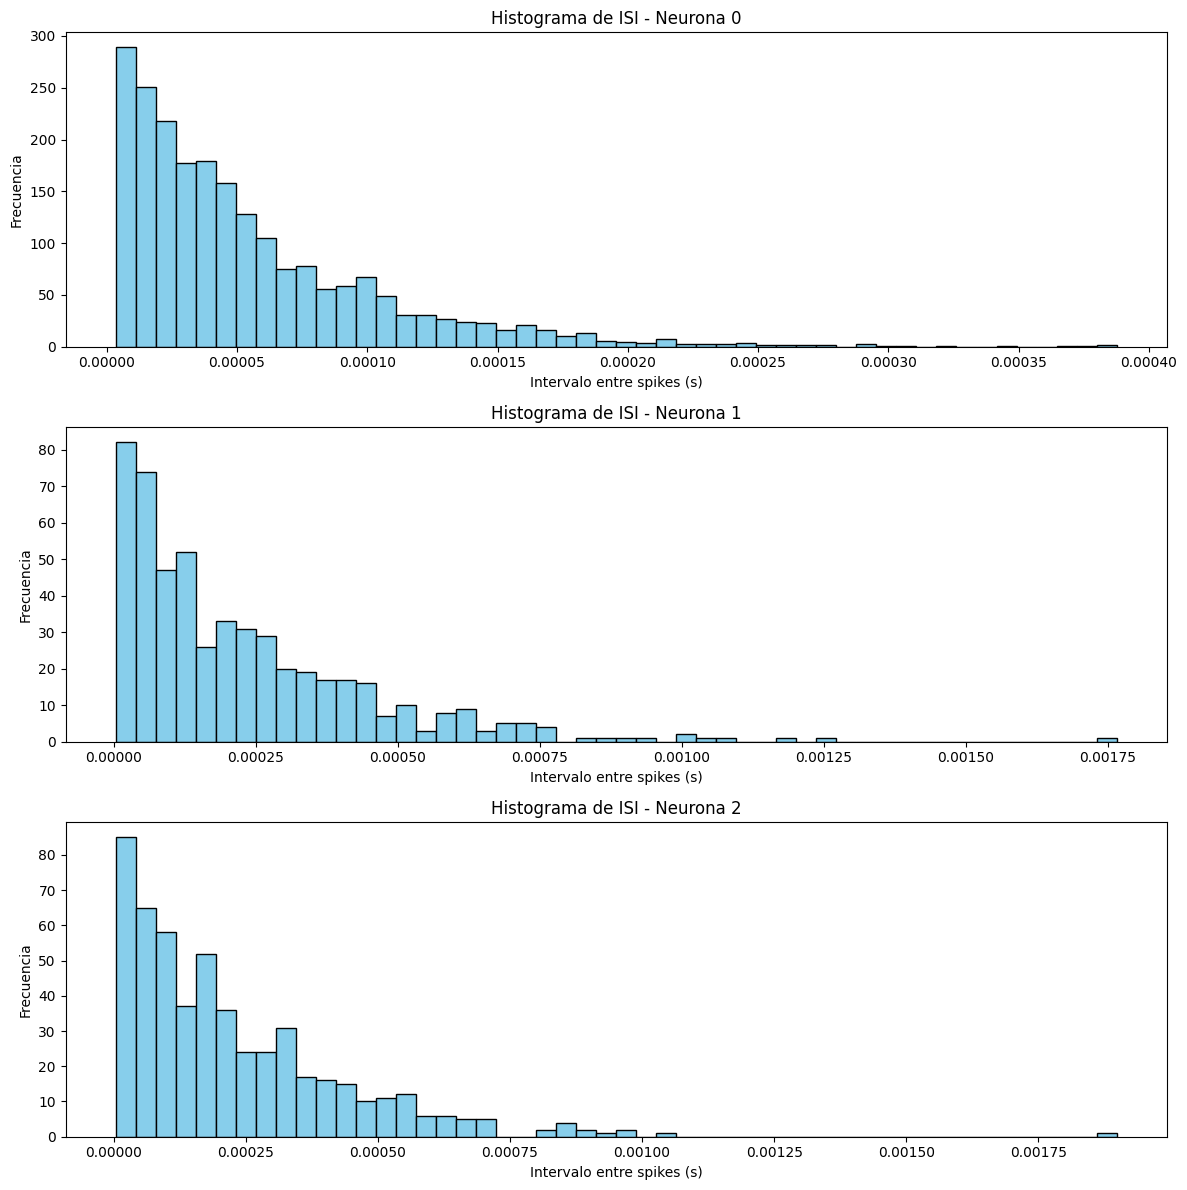

In [28]:
plt.figure(figsize=(12, 4 * len(neuronas)))

for i, n in enumerate(neuronas):
    # Tiempos de spikes de esa neurona, ordenados
    tiempos = np.sort(spike_times_sec[spike_class == n])

    # Cálculo del ISI (diferencia entre spikes consecutivos)
    isi = np.diff(tiempos)

    # Subgráfico por neurona
    plt.subplot(len(neuronas), 1, i+1)
    plt.hist(isi, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de ISI - Neurona {n}')
    plt.xlabel('Intervalo entre spikes (s)')
    plt.ylabel('Frecuencia')

    # Imprimimos también valores básicos
    print(f"Neurona {n} - ISI promedio: {np.mean(isi):.4f} s, ISI mínimo: {np.min(isi):.4f} s")

plt.tight_layout()
plt.show()
